In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
def f(x):
   return np.sin(2*np.pi*x)

In [16]:
M = 6

## Create random samples

In [17]:
N = 10
np.random.seed(seed=54)
xp = np.sort(np.random.random_sample(N))
np.random.seed(seed=58)
sigma = 0.1
tp = f(xp) + np.random.normal(0,sigma,N)

In [18]:
def basisfunction(samples, j): 
    return samples ** j 

def fitf(samples):
    return sum(w[j]*basisfunction(samples,j) for j in range(M))

## Design matrix

In [19]:
phi = np.zeros((N,M))
for n, x in enumerate(xp):
    for j in range(M):
        phi[n,j] = basisfunction(x, j)

## Find weights

In [20]:
phit = phi.transpose()
w = np.linalg.solve(np.dot(phit,phi), np.dot(phit,tp))
print(w)

[-1.13229028e-01  4.74781529e+00  1.74950833e+01 -1.13246911e+02
  1.48146632e+02 -5.68345566e+01]


## Plot the fit

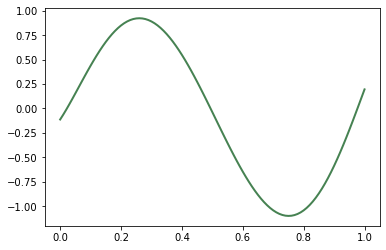

In [21]:

ngrid=101
xg = np.linspace(0,1,num=ngrid)
cmap = sns.cubehelix_palette(N+1, start=2, rot=0, dark=0, light=.7, reverse=True)

plt.plot(xg, fitf(xg), color=cmap[M], lw=2)

In [22]:
test = fitf(xg)
print(test)

[-0.11322903 -0.06411314 -0.01215714  0.04201196  0.09780135  0.15465174
  0.21203664  0.26946174  0.32646416  0.38261182  0.43750274  0.49076434
  0.5420528   0.59105233  0.63747453  0.68105767  0.72156604  0.75878926
  0.79254157  0.82266119  0.84900962  0.87147095  0.88995119  0.90437757
  0.91469788  0.92087979  0.92291014  0.92079428  0.91455538  0.90423376
  0.88988619  0.87158522  0.8494185   0.82348808  0.79390974  0.76081234
  0.72433707  0.68463681  0.64187547  0.59622725  0.54787599  0.49701452
  0.4438439   0.38857282  0.33141685  0.27259781  0.21234306  0.15088483
  0.08845952  0.02530703 -0.0383299  -0.10220642 -0.16607621 -0.22969218
 -0.29280715 -0.35517453 -0.41654901 -0.47668722 -0.53534846 -0.59229532
 -0.64729439 -0.70011697 -0.75053969 -0.79834527 -0.84332312 -0.88527009
 -0.92399111 -0.95929988 -0.99101958 -1.0189835  -1.04303578 -1.06303205
 -1.07884012 -1.09034069 -1.09742798 -1.10001046 -1.09801152 -1.09137013
 -1.08004154 -1.06399797 -1.04322928 -1.01774365 -0

## Error calculation

In [23]:
def MSE(true, fit):
    #include check for sizes
    dif = true-fit
    squared_dif = dif ** 2
    return sum(squared_dif)/len(true)
    

In [24]:
MSE(f(xg), fitf(xg))

0.008343728091864327

## Calculate weigths including a regu. term

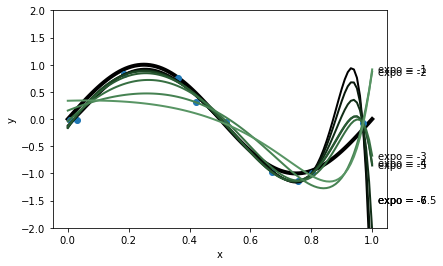

In [25]:
expos = [-7,-6.5,-6,-5,-4,-3,-2,-1]
sigma = 0.1
ngrid=101
xg = np.linspace(0,1,num=ngrid)
cmap = sns.cubehelix_palette(N+1, start=2, rot=0, dark=0, light=.7, reverse=True)
M = 2*N
plt.figure()
plt.plot(xg, f(xg),color=cmap[0],lw=4)
plt.plot(xp,tp,'o')
plt.xlabel('x')
plt.ylabel('y')

error= []
for i, expo in enumerate(expos):
    lamb = 10**(expo)
    lamb_tilde = lamb / sigma ** 2
    
    phi = np.zeros((N,M))
    for n, x in enumerate(xp):
        for j in range(M):
            phi[n,j] = basisfunction(x, j)
    
    omegatilde = np.linalg.inv(phi.transpose() @ phi + lamb*np.identity(M))
    w = np.dot(omegatilde, np.dot(phi.transpose(),tp))
    error.append(MSE(f(xg),fitf(xg)))
    
    plt.plot(xg, fitf(xg), color=cmap[i], lw=2)
    plt.text(1.02,min(max(fitf(1),-1.5),1.5),f'expo = {expo}',va='center')
    plt.ylim(-2,2)
    

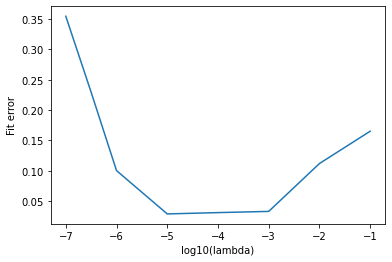

In [26]:
plt.figure()
plt.xlabel('log10(lambda)')
plt.ylabel('Fit error')
plt.plot(expos,error)

## Enemble

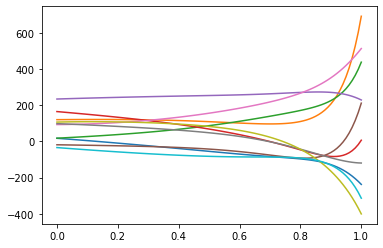

In [27]:
lamb = 10 ** -4
No_ens = 10
expo = -4
lambd = 10**expo
M = 2*N

error = []

ngrid=101
xg = np.linspace(0,1,num=ngrid)


phi = np.zeros((N, M))
for n, x in enumerate(xp): 
    for  j in range(M):
        phi[n,j] = basisfunction(x, j)
        
phit = phi.transpose()

omegatilde = np.linalg.inv(np.dot(phit, phi) + lambd*np.identity(M))
w0 = np.dot(omegatilde, np.dot(phit, tp))
w=w0

#taking ensembles from the normal distribution

for i in range(No_ens):
    w = np.random.multivariate_normal(np.zeros(M), np.identity(M)/lambd)
    plt.plot(xg, fitf(xg))

# Kernel regression 


In [28]:
# Creating random samples
N = 10
np.random.seed(seed=54)
xp = np.sort(np.random.random_sample(N))
np.random.seed(seed=58)
sigma = 0.1
tp = f(xp) + np.random.normal(0,sigma,N)

In [29]:
l = 0.2

def kernel(x, xx):
    return np.exp(-(x-xx)**2/(2*l**2))

def kernelvec(x): 
    kvec = np.array([kernel(x,xx) for xx in xp])
    return kvec



## Create prior distribution ensemble 

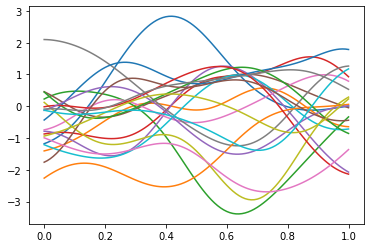

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xg = np.linspace(0,1,101)
l = 0.2
ngrid = 101
def kernel(x, xx):
    return np.exp(-(x-xx)**2/(2*l**2))

No_ens = 20

k =  np.array([[kernel(x,xx) for x in xg] for xx in xg])

for i in range(No_ens):
    y = np.random.multivariate_normal(np.zeros(ngrid), k)
    plt.plot(xg, y)

In [31]:
l = 0.1 #?
G = np.zeros((N,N))
for i in range(N): 
    for j in range(N):
        G[i, j] = np.exp(-(xp[i]-xp[j])**2)/(2*l**2)
        
a = np.dot(np.linalg.inv(G),f(xp))

sum([g(x,xp,)])



NameError: name 'g' is not defined

In [ ]:
np.random.sample()

In [ ]:
a